# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import  api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [78]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_df= pd.DataFrame(cities)
cities_df
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""
#cities_df.rename['0']= "City"
cities_df=cities_df.rename({0:'City'},axis=1)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,airai,,,,,,,,
1,sungaipenuh,,,,,,,,
2,rikitea,,,,,,,,
3,estepona,,,,,,,,
4,lompoc,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
url = "http://api.openweathermap.org/data/2.5/weather?"
Units = "metric"

set_index = 1

for index, row in cities_df.iterrows():
    
    city = row['City']
    
    i = (index // 50)
    if i >= 1:
        set_index = i + 1
    
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url).json()
        weather_response
        print(f"Processing Record {index} of set index {set_index} | {city}.")
        
        cities_df.loc[index, 'Cloudiness'] = weather_response['clouds']['all']
        cities_df.loc[index, 'Country'] = weather_response['sys']['country']
        cities_df.loc[index, 'Date'] = weather_response['dt']
        cities_df.loc[index, 'Humidity'] = weather_response['main']['humidity']
        cities_df.loc[index, 'Lat'] = weather_response['coord']['lat']
        cities_df.loc[index, 'Lng'] = weather_response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = weather_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    

Processing Record 0 of set index 1 | airai.
Processing Record 1 of set index 1 | sungaipenuh.
Processing Record 2 of set index 1 | rikitea.
Processing Record 3 of set index 1 | estepona.
Processing Record 4 of set index 1 | lompoc.
Processing Record 5 of set index 1 | codrington.
Processing Record 6 of set index 1 | bluff.
Processing Record 7 of set index 1 | marsa matruh.
Processing Record 8 of set index 1 | mahebourg.
Processing Record 9 of set index 1 | ushuaia.
Processing Record 10 of set index 1 | merced.
Processing Record 11 of set index 1 | shelburne.
Processing Record 12 of set index 1 | goicea.
Processing Record 13 of set index 1 | cape town.
Processing Record 14 of set index 1 | aasiaat.
Processing Record 15 of set index 1 | pokrovsk.
Processing Record 16 of set index 1 | khatanga.
Processing Record 17 of set index 1 | castro.
Processing Record 18 of set index 1 | pisco.
Processing Record 19 of set index 1 | sao filipe.
Processing Record 20 of set index 1 | buriti bravo.
Proc

Processing Record 187 of set index 4 | nazca.
Processing Record 188 of set index 4 | devonport.
Processing Record 189 of set index 4 | faanui.
Processing Record 190 of set index 4 | lujan.
Processing Record 191 of set index 4 | shajapur.
Processing Record 192 of set index 4 | bilma.
Processing Record 193 of set index 4 | kudahuvadhoo.
Processing Record 196 of set index 4 | zhuhai.
Processing Record 197 of set index 4 | teya.
Processing Record 198 of set index 4 | hithadhoo.
Processing Record 201 of set index 5 | santiago del estero.
Processing Record 202 of set index 5 | esperance.
Processing Record 203 of set index 5 | quatre cocos.
Processing Record 204 of set index 5 | saint-philippe.
Processing Record 205 of set index 5 | berlevag.
Processing Record 206 of set index 5 | longyearbyen.
Processing Record 207 of set index 5 | kuantan.
Processing Record 208 of set index 5 | yumen.
Processing Record 210 of set index 5 | cabo san lucas.
Processing Record 211 of set index 5 | lisala.
Proce

Processing Record 375 of set index 8 | troitskoye.
Processing Record 376 of set index 8 | velika gorica.
Processing Record 377 of set index 8 | olinda.
Processing Record 378 of set index 8 | vardo.
Processing Record 379 of set index 8 | antofagasta.
Processing Record 380 of set index 8 | santa maria.
Processing Record 381 of set index 8 | wewak.
Processing Record 382 of set index 8 | manono.
Processing Record 383 of set index 8 | mattawa.
Processing Record 384 of set index 8 | talnakh.
Processing Record 385 of set index 8 | ngaoundere.
Processing Record 386 of set index 8 | port hedland.
Processing Record 387 of set index 8 | srandakan.
Processing Record 388 of set index 8 | denpasar.
Processing Record 389 of set index 8 | evensk.
Processing Record 391 of set index 8 | eston.
Processing Record 392 of set index 8 | filingue.
Processing Record 393 of set index 8 | aras.
Processing Record 394 of set index 8 | luba.
Processing Record 395 of set index 8 | tuatapere.
Processing Record 396 of

Processing Record 557 of set index 12 | vakhrushev.
Processing Record 558 of set index 12 | isangel.
Processing Record 559 of set index 12 | buala.
Processing Record 560 of set index 12 | basco.
Processing Record 561 of set index 12 | belmonte.
Processing Record 562 of set index 12 | salalah.
Processing Record 563 of set index 12 | egvekinot.
Processing Record 564 of set index 12 | picota.
Processing Record 565 of set index 12 | turukhansk.
Processing Record 566 of set index 12 | tignere.
Processing Record 567 of set index 12 | roald.
Processing Record 568 of set index 12 | jizan.
Processing Record 569 of set index 12 | atambua.
Processing Record 570 of set index 12 | seydi.
Processing Record 571 of set index 12 | takhtamygda.
Processing Record 572 of set index 12 | te anau.
Processing Record 575 of set index 12 | itoman.
Processing Record 576 of set index 12 | aklavik.
Processing Record 577 of set index 12 | christchurch.
Processing Record 578 of set index 12 | almeria.
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [83]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,airai,0,TL,1554594676,67,-8.93,125.41,24.94,0.87
1,sungaipenuh,36,ID,1554594500,93,-2.08,101.38,19.29,0.62
2,rikitea,24,PF,1554594677,100,-23.12,-134.97,25.64,5.72
3,estepona,100,ES,1554591600,67,36.43,-5.15,15,11.3
4,lompoc,20,US,1554594445,68,34.64,-120.46,21.67,7.7


In [85]:
cities_df['Country'].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['Country'], inplace=True)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,airai,0,TL,1554594676,67,-8.93,125.41,24.94,0.87
1,sungaipenuh,36,ID,1554594500,93,-2.08,101.38,19.29,0.62
2,rikitea,24,PF,1554594677,100,-23.12,-134.97,25.64,5.72
3,estepona,100,ES,1554591600,67,36.43,-5.15,15,11.3
4,lompoc,20,US,1554594445,68,34.64,-120.46,21.67,7.7


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

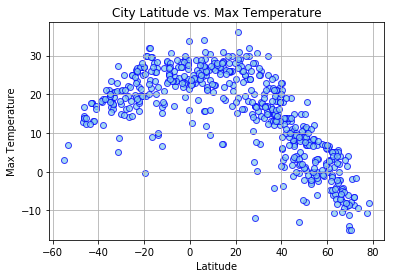

In [90]:
y_axis = cities_df["Max Temp"]
x_axis = cities_df["Lat"]

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
plt.scatter(x_axis, y_axis,marker='o',edgecolors='Blue',c='skyblue',alpha=0.75)
plt.savefig("Lat_vs_Max_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

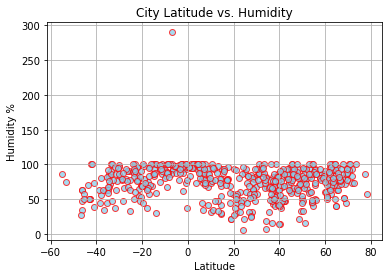

In [91]:
x_axis = cities_df["Lat"]
y_axis = cities_df["Humidity"]
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.scatter(x_axis, y_axis,marker='o',edgecolors='Red',c='skyblue',alpha=0.75)
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

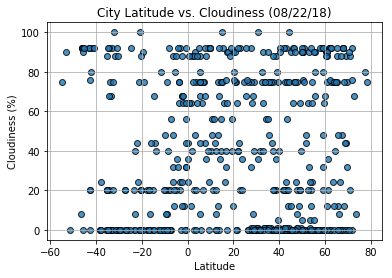

#### Latitude vs. Wind Speed Plot

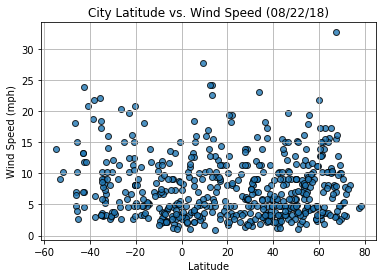